In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Section 3.0: retrieving data from valuesarray2.txt

All the data from valuesarray2.txt is retrieved and the valuesarray is recreated (each case holds 'a', 'e' and ΔSNR)

In [2]:
file1 = open('valuesarray2.txt', 'r') 
mylist1 = file1.readlines() #adds all lines of txt file to list

#list 2 is created to strip each element of list1 of 'n' and any unneeded spaces
mylist2 = []
for i in range(len(mylist1)):
    mylist2.append(mylist1[i].strip())
mylist2.pop(0) 
#^^removes first element of list, which is an empty line (just happens to be the case in the particular .txt file)

#here another list is created to float each element of list2, which were strings
mylist3 = []
for i in range(len(mylist2)):
    mylist3.append(float(mylist2[i]))

#finally, values array is created again
valuesarray = np.zeros((len(mylist3)/3,3))
count = 0
for i in range(len(mylist3)/3):
    valuesarray[i,0] = mylist3[count]
    valuesarray[i,1] = mylist3[count+1]
    valuesarray[i,2] = mylist3[count+2]
    count = count + 3

Section 3.1: plotting 'a', 'e' and ΔSNR

Creates a 3-D plot with 'a' as the x-axis, 'e' as the y-axis and the averaged ΔSNR for each 100 cases with same 'a' and 'e' as the z-axis.

<IPython.core.display.Javascript object>


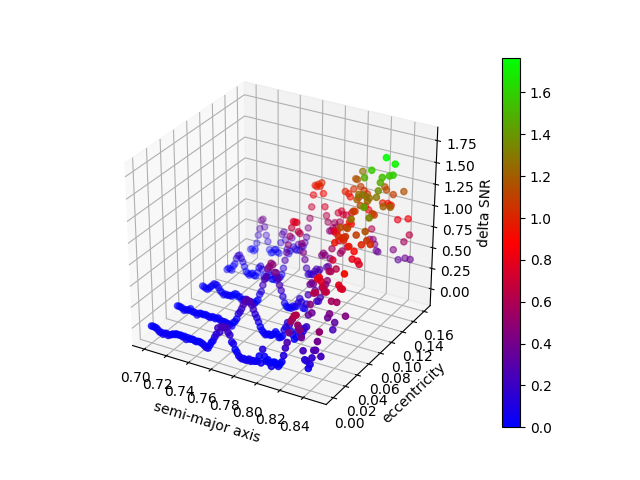

In [3]:


%matplotlib notebook 
#^^allows the figure to be manipulated once created

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#each 100 cases have the same 'a' and 'e' values, just varying 'f' and 'omega' values, these 100 cases are all averaged together into one case here
averagearray = np.zeros((len(valuesarray)/100,3)) 
for k in range(len(averagearray)):
    tempzaverage = 0 #'a' and 'e' do not have to be averaged, they are the same for all 100 cases. only the ΔSNR is different
    for i in range(100):
        tempzaverage = tempzaverage + valuesarray[k*100+i,2] 
    tempzaverage = tempzaverage/100
    averagearray[k,0] = np.sqrt((valuesarray[k*100,0])**2)
    averagearray[k,1] = valuesarray[k*100,1]
    averagearray[k,2] = tempzaverage

xlist = []
ylist = []
zlist = []

for i in range(len(averagearray)):
    xlist.append(averagearray[i,0])
    ylist.append(averagearray[i,1])
    zlist.append(averagearray[i,2])
    
p = ax.scatter(xlist, ylist, zlist, c=np.abs(zlist),cmap="brg") #plots the figure

fig.colorbar(p)

ax.set_xlabel('semi-major axis')
ax.set_ylabel('eccentricity')
ax.set_zlabel('delta SNR')

plt.show()

#this commented out section is to produce a figure not with the averaged values (for each 100 cases with the same 'a' and 'e' values) but for every single case
# xlist = []
# ylist = []
# zlist = []

# for i in range(len(valuesarray)):
#     xlist.append(valuesarray[i,0])
#     ylist.append(valuesarray[i,1])
#     zlist.append(valuesarray[i,2])

    
# ax.scatter(xlist, ylist, zlist, c=np.abs(zlist),cmap="YlGn")

# ax.set_xlabel('semi-major axis')
# ax.set_ylabel('eccentricity')
# ax.set_zlabel('delta SNR')

# plt.show()

Section 3.2: plotting 'a', 'e' and transit timing variation

Creates a 3-D plot with 'a' as the x-axis, 'e' as the y-axis and the averaged transit timing variation (in hours) for each 100 cases with same 'a' and 'e' as the z-axis. Essentially, the ttvarray used in section 2 is recreated except further each case individually is averaged and then also each 100 cases with the same 'a' and 'e' are averaged.

<IPython.core.display.Javascript object>


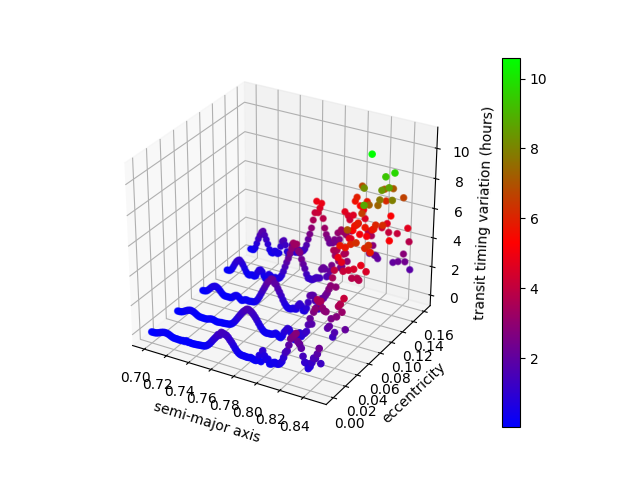

In [15]:
file1 = open('ttvdata2.txt', 'r') 
mylist1 = file1.readlines() 

#list 2 is created to strip each element of list1 of 'n' and any unneeded spaces
mylist2 = []
for i in range(len(mylist1)):
    mylist2.append(mylist1[i].strip())
mylist2.pop(0) 
#^^removes first element of list, which is an empty line (just happens to be the case in the particular
#text file)

#here another list is created to float each element of list2, which were strings
mylist3 = []
for i in range(len(mylist2)):
    mylist3.append(float(mylist2[i]))

#ttvarray1 is created to hold each 21 elements ('a', 'e' and 19 years of variations) for each case
ttvarray1 = np.zeros((len(mylist3)/21, 21))
count = 0
for i in range(len(mylist3)/21): 
    for j in range(21): 
        ttvarray1[i,j] = mylist3[count]
        count = count+1
    
#ttvarray 2 removes the 11 years for which we do not have data (5-15 inclusive), first two are 'a' and 'e'
ttvarray2 = np.zeros((len(mylist3)/21,10))
for i in range(len(mylist3)/21):
    for b in range(2):
        ttvarray2[i,b] = ttvarray1[i,b]
    for k in range(4):
        ttvarray2[i,2+k] = ttvarray1[i,2+k]
    for p in range(4):
        ttvarray2[i,6+p]= ttvarray1[i,17+p]

        
#ttvarray3 finds the average variations for each case (each case holds 8 different transit variations, one for each year)
ttvarray3 = np.zeros((len(mylist3)/21,3))
for i in range(len(ttvarray2)):
    ttvarray3[i,0] = ttvarray2[i,0]
    ttvarray3[i,1] = ttvarray2[i,1]
    ttvaverage = 0
    for j in range(8):
        ttvaverage = ttvaverage + abs(ttvarray2[i,j+2])
    ttvaverage = ttvaverage/8
    ttvarray3[i,2] = ttvaverage


#ttvarray finds the average of each 100 cases with same 'a' and 'e' values in ttvarray3
ttvarray = np.zeros((len(ttvarray3)/100, 3))
for i in range(len(ttvarray3)/100):
    ttvarray[i,0] = ttvarray3[i*100,0]
    ttvarray[i,1] = ttvarray3[i*100,1]
    ttvaverage1 = 0
    for j in range(100):
        ttvaverage1 = ttvaverage1 + ttvarray3[i*100+j,2]
    ttvaverage1 = ttvaverage1/100
    ttvarray[i,2] = ttvaverage1

#finally: the plotting
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xlist = []
ylist = []
zlist = []

for i in range(len(ttvarray)):
    xlist.append(ttvarray[i,0])
    ylist.append(ttvarray[i,1])
    zlist.append(ttvarray[i,2])
    
p = ax.scatter(xlist, ylist, zlist, c=np.abs(zlist),cmap="brg")

fig.colorbar(p)

ax.set_xlabel('semi-major axis')
ax.set_ylabel('eccentricity')
ax.set_zlabel('transit timing variation (hours)')

plt.show()

Section 3.3: confirming values

A single ttv value (the lone green dot, around (0.785, 0.12, 8.5) was run by itself and averaged over 100 times. The averaged result for ΔSNR when the yearly transit timing was changed by 8.5 hours was 1.7, which is similar to the corresponding point of (0.785, 0.12, 1.40) on figure 1 (a,e,ΔSNR). The code below is a duplicate of section 2, with minor adjustments. 

In [16]:
def trybox():
    global testarray
    global testarray1
    
    testarray = np.zeros(int(halfhoursinyear))
    testarray1 = np.zeros(int(halfhoursinyear))
    
    
    #creating a box for with venus
    ta_midpoint = midpoint 
    ta_tempsp = ta_midpoint - tempdistance/2
    ta_tempep = ta_midpoint + tempdistance/2
    
    ta_decimalsp = ta_tempsp - int(ta_tempsp)
    ta_decimalep = ta_tempep - int(ta_tempep)

    if ta_decimalsp > 0.50:
        ta_sp = int(ta_tempsp)+2 #start point of full value transits
        ta_percentsp = 1 - (ta_decimalsp - 0.50)
        ta_beforesp = int(ta_tempsp)+1 #the start point that doesn't have full value
        testarray[ta_beforesp] = 0 - tempdepth*ta_percentsp
    elif ta_decimalsp < 0.50:
        ta_sp = int(ta_tempsp)+1
        ta_percentsp = 1 - (0.50-ta_decimalsp)
        ta_beforesp = int(ta_tempsp)
        testarray[ta_beforesp] = 0 - tempdepth*ta_percentsp
     
    if ta_decimalep < 0.50:
        ta_ep = int(ta_tempep)-1
        ta_percentep = 1 - (0.50-ta_decimalep)
        ta_afterep = int(ta_tempep)
        testarray[ta_afterep] = 0 - tempdepth*ta_percentep
    if ta_decimalep > 0.50:
        ta_ep = int(ta_tempep)
        ta_percentep = 1 - (ta_decimalep - 0.50)
        ta_afterep = int(ta_tempep)+1
        testarray[ta_afterep] = 0 - tempdepth*ta_percentep

    ta_actual_length_of_transit = ta_ep-ta_sp+1 #do i add one or not????
        
    for z in range(ta_actual_length_of_transit):
        testarray[ta_sp+z] = 0 - tempdepth
    
    #again, but now without venus
    ta_midpoint1 = midpoint
    ta_tempsp1 = ta_midpoint1 - tempdistance1/2
    ta_tempep1 = ta_midpoint1 + tempdistance1/2
        
        
    ta_decimalsp1 = ta_tempsp1 - int(ta_tempsp1)
    ta_decimalep1 = ta_tempep1 - int(ta_tempep1)

    if ta_decimalsp1 > 0.50:
        ta_sp1 = int(ta_tempsp1)+2 #start point of full value transits
        ta_percentsp1 = 1 - (ta_decimalsp1 - 0.50)
        ta_beforesp1 = int(ta_tempsp1)+1 #the start point that doesn't have full value
        testarray1[ta_beforesp1] = 0- tempdepth1*ta_percentsp1
    elif ta_decimalsp1 < 0.50:
        ta_sp1 = int(ta_tempsp1)+1
        ta_percentsp1 = 1 - (0.50-ta_decimalsp1)
        ta_beforesp1 = int(ta_tempsp1)
        testarray1[ta_beforesp1] = 0- tempdepth1*ta_percentsp1
     
    if ta_decimalep1 < 0.50:
        ta_ep1 = int(ta_tempep1)-1
        ta_percentep1 = 1 - (0.50-ta_decimalep1)
        ta_afterep1 = int(ta_tempep1)
        testarray1[ta_afterep1] = 0 - tempdepth1*ta_percentep1
    if ta_decimalep1 > 0.50:
        ta_ep1 = int(ta_tempep1)
        ta_percentep1 = 1 - (ta_decimalep1 - 0.50)
        ta_afterep1 = int(ta_tempep1)+1
        testarray1[ta_afterep1] = 0 - tempdepth1*ta_percentep1

    ta_actual_length_of_transit1 = ta_ep1-ta_sp1+1
        
    for z in range(ta_actual_length_of_transit1):
        testarray1[ta_sp1+z] = 0 - tempdepth1
        

        

def findbox():   
    #create an array that contains all the average values throughout a year
    averagesarray = np.zeros(int(halfhoursinyear))
    averagesarray1 = np.zeros(int(halfhoursinyear))
    for a in range(halfhoursinyear): 
        tempaverage = 0
        tempaverage1 = 0
        for b in range(numberofyears):
            tempaverage = tempaverage + myarray[b,1,a]
            tempaverage1 = tempaverage1 + myarray1[b,1,a]
        averagesarray[a] = tempaverage/numberofyears
        averagesarray1[a] = tempaverage1/numberofyears
        
    #create an initial value for setfit, for which tempfit will be lower
    setfit=10e10
    setfit1 =10e10
    
    global boxarray
    global boxarray1
    
    boxarray = np.zeros(int(halfhoursinyear))
    boxarray1 = np.zeros(int(halfhoursinyear))
    
    global tempdistance, tempdistance1
    global tempdepth, tempdepth1
    
    #try different variations of depth/distance of the box
    depth_run = 40
    depth_min=0.4
    depth_max=1.2
    depth_step=(depth_max-depth_min)/depth_run
    distance_run = 40  #change all distance variables to duration
    distance_min=0.5
    distance_max=3
    distance_step=(distance_max-distance_min)/distance_run
    for i in range(depth_run):
        tempdepth = (depth_min + depth_step*i)*depthoftransit 
        tempdepth1 = (depth_min + depth_step*i)*depthoftransit
        for j in range(distance_run):
            tempdistance = (distance_min + distance_step*j)*transitduration
            tempdistance1 = (distance_min + distance_step*j)*transitduration
            
            trybox()
           
            mylist = np.zeros(halfhoursinyear)
            mylist1 = np.zeros(halfhoursinyear)
            mylist = testarray - averagesarray
            mylist1 = testarray1 - averagesarray1
            
            
            tempfit = np.sum(mylist**2)
            tempfit1 = np.sum(mylist1**2)
            
            if tempfit < setfit:
                setfit = tempfit
                setdepth = tempdepth
                setdistance = tempdistance
                boxarray = testarray
                
            if tempfit1 < setfit1:
                setfit1 = tempfit1
                setdepth1 = tempdepth1
                setdistance1 = tempdistance1
                boxarray1 = testarray1
                
#now run everything
casenumbers = 100 #averaged 100 times

TEMPORARY = 0

for cn in range(casenumbers):
    numberofyears = 1
    lengthoforbit = 1
    transitduration = 12.9791194828*2 #in half hours
    midpoint = 50 #halfhours
    halfhoursinyear = 17520*lengthoforbit
    depthoftransit = 0.00008389575
    sigma = 1*(5e-5)
    strengthofttv = 1

    myarray = np.zeros((numberofyears,2,int(halfhoursinyear)))
    myarray1 = np.zeros((numberofyears,2,int(halfhoursinyear)))
    #seperated by number of years (0=1-9=10), time=0, light=1
    
    withoutvenusarray = np.zeros(int(halfhoursinyear)) #creates an array with one space for each bin in the number of years
    withvenusarray = np.zeros(int(halfhoursinyear)) #creates another one, this one for with ttv
    #note not right anymore, fix, only running for one year. also make note to fix all places where halfhoursinyear is used instead of int(halfhoursinyear)
    
    randomnoisearray = np.zeros((numberofyears, int(halfhoursinyear)))
    
    for i in range(numberofyears):
        
        #RUN WITHOUT VENUS VARIATIONS
        #setting all time to increase by 1/17520th of a year (half hour) increments within the period of each year
        for j in range(len(myarray1[i,0])):
            myarray1[i,0,j]= 0 + j*0.5    #0.00005707762
   
        #setting all light levels = 1 (mean) 
        for k in range(len(myarray1[i,1])):
                myarray1[i,1,k]=0

        #subtracting the light decrease resulting from transit
        ttvsp1 = midpoint - transitduration/2 #transit start point
        ttvep1 = midpoint + transitduration/2 #transit end point
        
       
        decimalsp1 = (ttvsp1 - int(ttvsp1))
        decimalep1 = (ttvep1 - int(ttvep1))
        
        if decimalsp1 > 0.50:
            sp1 = int(ttvsp1)+2 #start point of full value transits
            percentsp1 = 1 - (decimalsp1 - 0.50)
            beforesp1 = int(ttvsp1)+1 #the start point that doesn't have full value
            myarray1[i, 1, beforesp1] = myarray1[i,1,beforesp1] - depthoftransit*percentsp1
        elif decimalsp1 < 0.50:
            sp1 = int(ttvsp1)+1
            percentsp1 = 1 - (0.50-decimalsp1)
            beforesp1 = int(ttvsp1)
            myarray1[i, 1, beforesp1] = myarray1[i,1,beforesp1] - depthoftransit*percentsp1
        
        
        if decimalep1 < 0.50:
            ep1 = int(ttvep1)-1
            percentep1 = 1 - (0.50-decimalep1)
            afterep1 = int(ttvep1)
            myarray1[i, 1, afterep1] = myarray1[i,1,afterep1] - depthoftransit*percentep1
        if decimalep1 > 0.50:
            ep1 = int(ttvep1)
            percentep1 = 1 - (decimalep1 - 0.50)
            afterep1 = int(ttvep1)+1
            myarray1[i, 1, afterep1] = myarray1[i,1,afterep1] - depthoftransit*percentep1
        
        actual_length_of_transit1 = ep1-sp1+1
        
        for z in range(actual_length_of_transit1):
            myarray1[i,1,sp1+z] = myarray1[i,1,sp1+z] - depthoftransit

        #adding noise
        for m in range(len(myarray1[i,1])):
            randomnoisearray[i,m] = np.random.normal(0,sigma) #mean is 1, range of distribution is 0.00005 either direction (e-5)
            myarray1[i,1,m] = myarray1[i,1,m] + randomnoisearray[i,m]

        
        
        #RUN WITH VENUS VARIATIONS
        #setting all time to increase by 1/17520th of a year (half hour) increments within the period of each year
        for j in range(len(myarray[i,0])):
            myarray[i,0,j]= 0 + j*0.5    #0.00005707762
       
        #setting all light levels = 0 (mean) 
        for k in range(len(myarray[i,1])):
                myarray[i,1,k]=0

        #subtracting the light decrease resulting from transit
        ttvmidpoint = midpoint + 8.5 #changed it because the first two values are a and e

        ttvsp = ttvmidpoint - transitduration/2 #transit start point
        ttvep = ttvmidpoint + transitduration/2 #transit end point
        
       
        decimalsp = (ttvsp - int(ttvsp))
        decimalep = (ttvep - int(ttvep))
        
        if decimalsp > 0.50:
            sp = int(ttvsp)+2 #start point of full value transits
            percentsp = 1 - (decimalsp - 0.50)
            beforesp = int(ttvsp)+1 #the start point that doesn't have full value
            myarray[i, 1, beforesp] = myarray[i,1,beforesp] - depthoftransit*percentsp
        elif decimalsp < 0.50:
            sp = int(ttvsp)+1
            percentsp = 1 - (0.50-decimalsp)
            beforesp = int(ttvsp)
            myarray[i, 1, beforesp] = myarray[i,1,beforesp] - depthoftransit*percentsp
        
        
        if decimalep < 0.50:
            ep = int(ttvep)-1
            percentep = 1 - (0.50-decimalep)
            afterep = int(ttvep)
            myarray[i, 1, afterep] = myarray[i,1,afterep] - depthoftransit*percentep
        if decimalep > 0.50:
            ep = int(ttvep)
            percentep = 1 - (decimalep - 0.50)
            afterep = int(ttvep)+1
            myarray[i, 1, afterep] = myarray[i,1,afterep] - depthoftransit*percentep
        
        actual_length_of_transit = ep-sp+1
        
        for z in range(int(actual_length_of_transit)):
            myarray[i,1,sp+z] = myarray[i,1,sp+z] - depthoftransit
        
    
        midpoint = midpoint + halfhoursinyear - int(halfhoursinyear)

        #adding noise
        for m in range(len(myarray[i,1])):
            myarray[i,1,m] = myarray[i,1,m] + randomnoisearray[i,m]
            
    findbox()
    
    #finding signal to noise ratio

    for m in range(halfhoursinyear):
        withvenusarray[m] = ((0 - boxarray[m])/sigma)**2
        withoutvenusarray[m] = ((0 - boxarray1[m])/sigma)**2
    

    SNR1 = np.sqrt(np.sum(withoutvenusarray))
    #print("signal to noise ratio without venus", SNR1)
    SNR2 = np.sqrt(np.sum(withvenusarray))
    #print("   signal to noise ratio with venus", SNR2)

    differenceinsnr = SNR1 - SNR2 #without venus - with venus
    
    print(cn)
    print(differenceinsnr)
    
    TEMPORARY = TEMPORARY + differenceinsnr
    
TEMPORARY = TEMPORARY/100 
print(TEMPORARY)

0
2.03291192264
1
1.96511481994
2
2.01469474099
3
2.46047922794
4
2.60269763483
5
1.67655595568
6
1.61673366627
7
2.1986810295
8
1.91808484562
9
1.12690313281
10
0.905108859434
11
2.15987102843
12
0.940993853966
13
2.29312514157
14
1.76393361189
15
0.606942254882
16
1.60799804996
17
2.43942381901
18
1.68699212667
19
0.92331213301
20
2.30706403537
21
1.02677297614
22
2.02619754414
23
2.15812008784
24
1.86383456348
25
1.93200053513
26
1.0932307713
27
2.18822234524
28
1.26679927801
29
2.19580025287
30
1.06172053206
31
1.02562671247
32
1.88490203063
33
1.42159076811
34
2.54172004884
35
1.35233588717
36
2.03333533699
37
1.79172842674
38
2.29245831335
39
1.62059233181
40
1.10636813909
41
0.994899932145
42
1.99934486147
43
2.11074383011
44
1.87963507293
45
1.53577066642
46
2.71364333972
47
1.44859305625
48
2.28999726187
49
0.937488334503
50
0.492611615318
51
1.71652274141
52
2.36148686292
53
1.16784422804
54
2.37298384101
55
2.47723651384
56
2.48135752501
57
1.90924908588
58
1.75875980991
59


Section 3.4: plotting ΔSNR to transit timing variation (in hours)

<IPython.core.display.Javascript object>


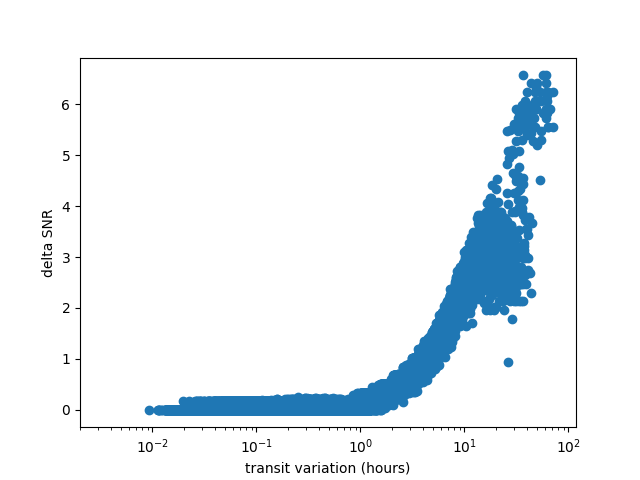

In [18]:
#plots ΔSNR (y) and ttv(x) (plots all 47433 cases). 
xlist = []
ylist = []

for i in range(len(ttvarray3)):
    xlist.append(abs(ttvarray3[i,2]))
    ylist.append(abs(valuesarray[i,2]))
    
fig = plt.scatter(xlist,ylist)  
plt.xlabel("transit variation (hours)")
plt.ylabel("delta SNR")

plt.xscale('log')